
this report refers to the Internet,and the ppt of 机器学习与知发现，模识识别导论.<br>
<img src="../photo/HW1_require.png" width="1000" height="700"/><br>

To briefly analyze the problem, it is a problem that analyzes the multi linear regression using the ridge regression.<br>
To do this, it is necessary to analyze multi-linear regression first.<br>
The difference between multi-linear regression and general linear regression is that the output value, y, is influenced by multiple input values

That is, in simple linear regression, if the hypothesis (prediction) function is:<br>
${\mathbf f(x) = w(0) + w(1)*x(1)} $<br>
where x(1) is only input value

$ 𝑓(x) = 𝑤(0) + 𝑤(1) 𝑥(1) + ⋯ + 𝑤(𝑛)𝑥(𝑛) = 𝑤^𝑇x$<br>

The hypothesis (prediction) function in multiple linear regression is that:<br>
where x_1, x_2...x_n are multiple input values<br>
Here, the number of input variables is called feature.<br>
So, what is the difference between multiple linear regression and simple linear regression?<br>

For now, the cost function (purpose function) does not change.

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Cost_Function_Formula.png)<br>
This is the cost function of gradient descent, This time, I'll apply the ridge regression and<br>
adding L2 rugularization in this formumla

${\mathrm{SSE}}_{L2}=min_w{\Sigma_{i=0}^n\frac{\gamma}{2}\left|w\right|}_2^2+\Sigma_{j=0}^m\left|Xw-y\right|_2^2 $<br>
Let's try to analyze problem first.<br>

1.$\text{randomly generate the true answer } \bar{w} ∈ R_n \text{ from } w_i ∼ N(0, 1)$<br>
2.$\text{randomly generate X }∈ R^{m×n} \text{ from } X_{ij} ∼ N(0, 1)$<br> 
3.$\text{calculate y = Xw + ε with ε ∼ N(0, σ2), where the σ is set such that the signal-to-noise ratio is 20}$<br>

The part that says regularization terms is L2 regularization, which is the core of ridge regression.<br>
Considering that Regularization means learning to reduce the weight w
This means that you will eventually be less affected by local noise.<br>
![title](../photo/distance.png)<br>
In terms of vectors, we can think of L1 regularization as a yellow line and L2 regularizaion as a green line.<br>
So here we have a unique value for each vector, and we can see that feature selection is possible.<br>
The difference is that for L1, certain features can be ignored.<br>

![title](../photo/ridge_and_lasso.png)<br>

As you can see here, in the case of l1, differentiation is impossible in some parts, so some feature could be loss,<br>
so you have to be careful when performing gradient-base learning.<br>
The price can get messed up if it suddenly becomes 0.<br>

Now let's do it with code. In previous implementations with multiple linear regression, the required functions were:<br>
1. Normalization function<br>
2. Cost function
3. Gradient descent method

In ridge regression, you can change the functions to ridge regression form here, and then add l2 regulation.<br>
Finally, let's compare and plot when there is regularization and when there is no regularization.

In [68]:
import numpy as np
import math
from matplotlib import pyplot as plt


plt.style.use('seaborn-white')
"""
parameter explain
X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones, we can also call class or labels)
y : 1D array of labels/target value for each traing example. dimension(1 x m)
theta : 1D array of fitting parameters or weights. Dimension (1 x n)
J : Scalar value result of gradient descent 
"""
%matplotlib inline
np.random.seed(42)



In [69]:
def make_sample(w=1, b=0, size=100, noise=0.2): #w = weight b = bias
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    return x, yy



In [96]:
def make_multi_sample(num_data,num_features): #m = size n = features
    # num_data = 2
    # num_features = 1000
    true_w = np.array([1 for i in range(0,num_features)])
    true_b = 0
    features = np.random.normal(scale=1, size=(num_data, num_features))#데이터가 120개에 피쳐가 100개면 최종적으로 120*100이 되야하는게 맞지
    labels = np.dot(features, true_w) + true_b#final y eq
    labels += np.random.normal(scale=0.2, size=labels.shape)
    return features, labels

#print(x)
def use_svg_display():
    # Display in vector graphics
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # Set the size of the graph to be plotted
    plt.rcParams['figure.figsize'] = figsize


In [71]:
x,y = make_multi_sample(100,100)

In [72]:

def costfunction(X,y,theta):
  """
  Compute the cost of a particular choice of theta for linear regression.
  """
  m=np.size(y)
  J=0
  predictions = X.dot(theta)#internal of x and theta
  errors = np.subtract(predictions, y)#transition matrix w^t*x - actual value y  
  sqrErrors = np.square(errors)#formula of cost function
  J = 1 / (2 * m) * np.sum(sqrErrors)#rmse
  return J #gradient


def costFunctionReg(X,y,theta,gamma = 10):
    '''Cost function for ridge regression (regularized L2)
        gamma : regularization parameter
    '''
    #Initialization
    m = np.size(y) 
    J = 0
    #Vectorized implementation
    predictions = X.dot(theta)#dot product of x and theta
    errors = np.subtract(predictions, y)#transition matrix w^t*x - actual value y  
    sqrErrors = np.square(errors)#formula of cost function
    J_reg = (gamma / (2*m)) * np.sum(np.square(theta))#add l2 regularization
    J = 1 / (2 * m) * np.sum(sqrErrors)+J_reg#rmse  
    return J 



Normalization
Extend capabilities
Average Normalization

Feature Scaling : Feature scaling divides the input value by the range of input variables (maximum - minimum). With this technology, we get only one new range.
 x1 = x1 / s1
  where,
  x1 = input variable
  s1 = range
 
  x1 = (x1 - mu1)/s1
  where,
  x1 = input variable
  mu1 = average value
  s1 = range or standard deviation

In [ ]:
def feature_normalize(X):
  """
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
  """
  #Note here we need mean of indivdual column here, hence axis = 0
  mu = np.mean(X, axis = 0)  
  # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
  sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range) 표준편차 ddof를 지정해주는 이유는 numpy의 std default가 0이기 때문
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

In [73]:
def gradient_descent(X,y,theta,lr = 0.005,iterations=100):
    '''Gradient descent for linear regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(iterations)
    
    for i in range(iterations):
        #Cost and intermediate values for each iteration

        #Grad function in vectorized form
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y) #subtract of predict value and actual value
        sum_delta = (lr / m) * X.transpose().dot(errors) #dot of transition matrix X and error
        theta = theta - sum_delta #update weights theta

        J_history[i] = costfunction(X,y,theta)#cost history

    return theta,J_history

def gradient_descent_reg(X,y,theta,lr=0.005,gamma = 0.05,iterations=100):
    '''Gradient descent for ridge regression'''
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(iterations)

    for i in range(iterations):
        #Hypothesis function
        
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y) #subtract of predict value and actual value
        sum_delta = (lr / m) * (X.transpose().dot(errors)+gamma*theta) #dot of transition matrix X and error
        theta = theta - sum_delta #update weights       
        #Cost function in vectorized form       
        J_history[i] = costFunctionReg(X,y,theta,gamma)       
        #Calculate the cost for each iteration(used to plot convergence)

    return theta ,J_history

In [77]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
n=len(y)
theta = np.zeros(n)
iterations = 100
gamma = 0.15
#X= np.stack((x,y),axis=1)
#print(X)
#print(X.size)
x=x.reshape(100,100)
X = np.hstack((np.ones((n,1)), x))


In [83]:
print(x.shape,y.shape)
theta1, cost_history1 = gradient_descent(x, y, theta, lr=0.05, iterations=100)
theta2, cost_history2 = gradient_descent_reg(x, y, theta,lr=0.05, gamma=10, iterations=100)

print('Final value of theta =', theta1[:5])
print('First values from cost_history =', cost_history1[:1])
print('Last values from cost_history =', cost_history1[-1 :])
print(len(cost_history1),len(cost_history2)) 

(100, 100) (100,)
Final value of theta = [ 0.70022202 -0.06387357  1.11363914  0.13905832  0.66211119]
First values from cost_history = [39.70577951]
Last values from cost_history = [0.53367607]
100 100


Text(0.5, 1.0, 'Convergence of gradient descent(ridge)')

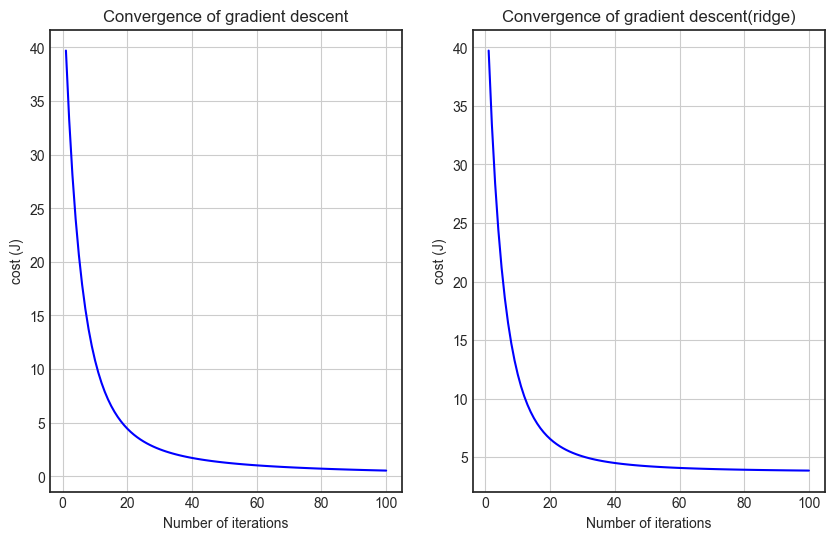

In [84]:
plt.subplot(1,2,1)
plt.plot(range(1, iterations +1), cost_history1, color ='blue')
plt.rcParams["figure.figsize"] = (16,8)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

plt.subplot(1,2,2)
plt.plot(range(1, iterations +1), cost_history2, color ='blue')
plt.rcParams["figure.figsize"] = (16,8)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent(ridge)")




A comparison of ridge regression and general regression showed that ridge regression did not fall below a certain level due to the influence of l2.<br>

Ridge regression results in one dimension were found to be quite uniform compared to the original objective function.

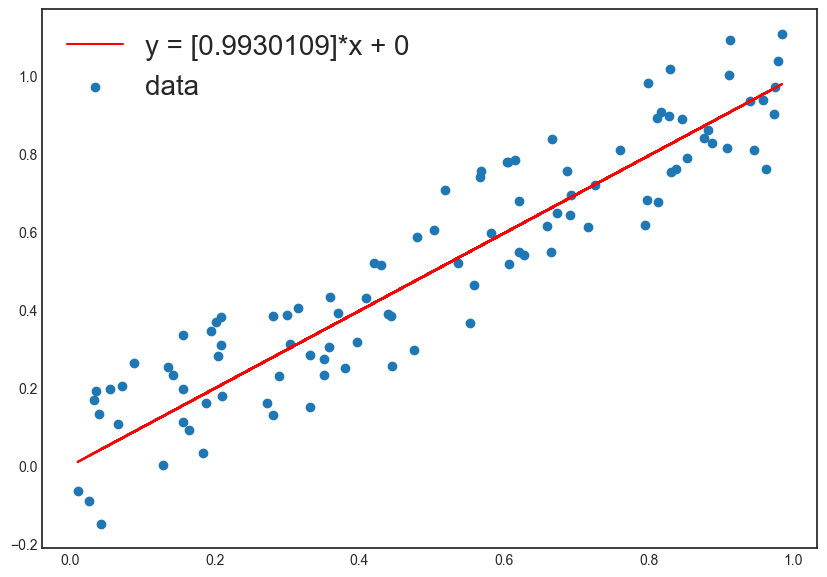

w: [0.9930109], b: 0


In [ ]:
x, y = make_sample(w=theta2, b=0, size=100, noise=0.2)


The Impact of Regulatory Values<br>
To determine the effect of regulatory values on convergence, we stored and plotted the cost records for other regulatory values.<br>
It was quite interesting to see the change in the convergence curve as the regulatory value changed.<br>
As a result, we were able to confirm that the final w value was changed.<br>

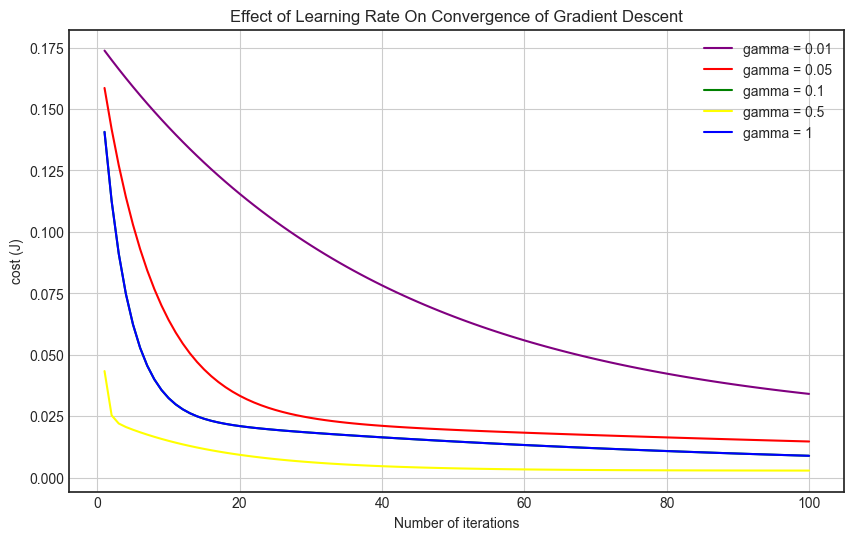

In [ ]:
iter = 100
theta = np.zeros(n)

gamma = 0.01
theta_1, cost_history_1 = gradient_descent_reg(X, y, theta, gamma, iter)

gamma = 0.05
theta_2, cost_history_2 = gradient_descent_reg(X, y, theta, gamma, iter)

gamma = 0.1
theta_3, cost_history_3 = gradient_descent_reg(X, y, theta, gamma, iter)

gamma = 0.5
theta_4, cost_history_4 = gradient_descent_reg(X, y, theta, gamma, iter)

gamma = 0.1
theta_5, cost_history_5 = gradient_descent_reg(X, y, theta, gamma, iter)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'gamma = 0.01')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'gamma = 0.05')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'gamma = 0.1')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'gamma = 0.5')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'gamma = 1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

Now, I'm going to solve the problem in the 100th dimension as the problem demands.<br>

In [82]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
n=len(y)
theta = np.zeros(n)
iterations = 100
gamma = 0.15
#X= np.stack((x,y),axis=1)
#print(X)
#print(X.size)
x=x.reshape(100,100)
X = np.hstack((np.ones((n,1)), x))


In [ ]:
theta1, cost_history1 = gradient_descent(x, y, theta, lr=0.05, iterations=100)
theta2, cost_history2 = gradient_descent_reg(x, y, theta,lr=0.05, gamma=0.1, iterations=100)

print('Final value of theta =', theta1)
print('First 5 values from cost_history=', cost_history1[:5])
print('Last 5 values from cost_history =', cost_history1[-5 :])
print(len(cost_history1),len(cost_history2)) 

Final value of theta = [ 0.81794762  0.6292926   0.74959018  0.57591977  1.08701005  0.39932226
  0.44692181  0.89222841  0.40876979  0.6203955   0.90784487  0.53345372
  0.29993522  1.2310741   0.39322266  1.06473384  0.69358918  1.16581654
  0.70649435  1.04624626  0.55283878  0.910096    1.02012523  1.07563121
  0.36975055  0.90325612  0.72118296  0.13011352  0.97758523  0.74432317
  0.71923505  1.06367042  0.20918428  1.4074633   0.45448597  0.86337003
  0.18237565  1.0364255   0.74888311  0.9379955   0.54956283  0.77000663
  0.95095933  1.0007628   0.4721181   0.56270657  0.35798745  1.28814149
  0.92451731  0.69613358  0.79624302  0.40291632  1.03906227  0.6732592
  0.69822448  1.05661052  0.13513641  0.63453988  0.87559258  0.7729402
  0.61328028  0.90760542  1.29408785  0.50425185  0.35223855  0.75676379
  1.20876564  0.45688914  0.63928125  1.03142139  1.11656763  1.28579103
 -0.03094845  0.97388857  0.78572364  0.81023995  1.0739623   1.30313982
  0.9198963   0.99513202  0.57

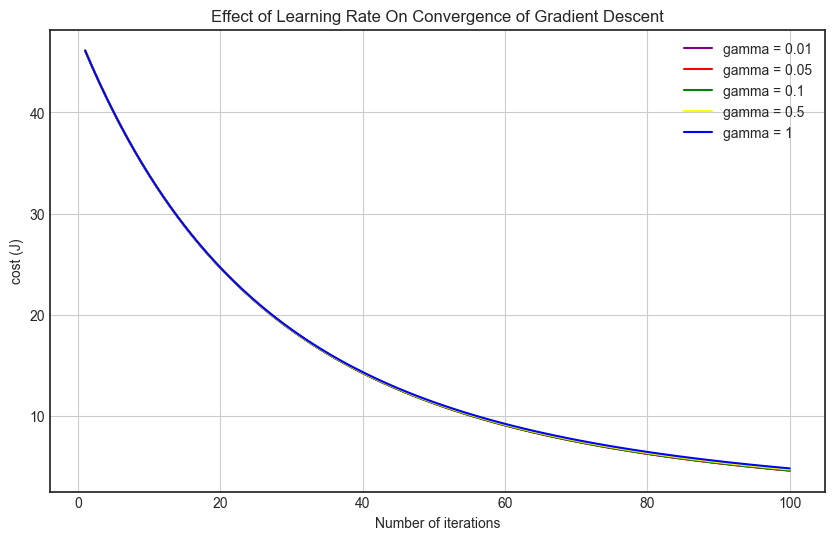

In [ ]:
iter = 100
theta = np.zeros(n)
lr=0.01
gamma = 0.01
theta_1, cost_history_1 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

gamma = 0.05
theta_2, cost_history_2 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

gamma = 0.1
theta_3, cost_history_3 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

gamma = 0.5
theta_4, cost_history_4 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

gamma = 1
theta_5, cost_history_5 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'gamma = 0.01')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'gamma = 0.05')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'gamma = 0.1')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'gamma = 0.5')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'gamma = 1')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

Perhaps because of the large number of datasets, the amount of change according to the regulatory value was insufficient.<br>
We're going to increase the regulation, we're going to draw a graph<br>
Let's compare and conclude the increase in loss function according to the number of data and the number of dimensions.<br>

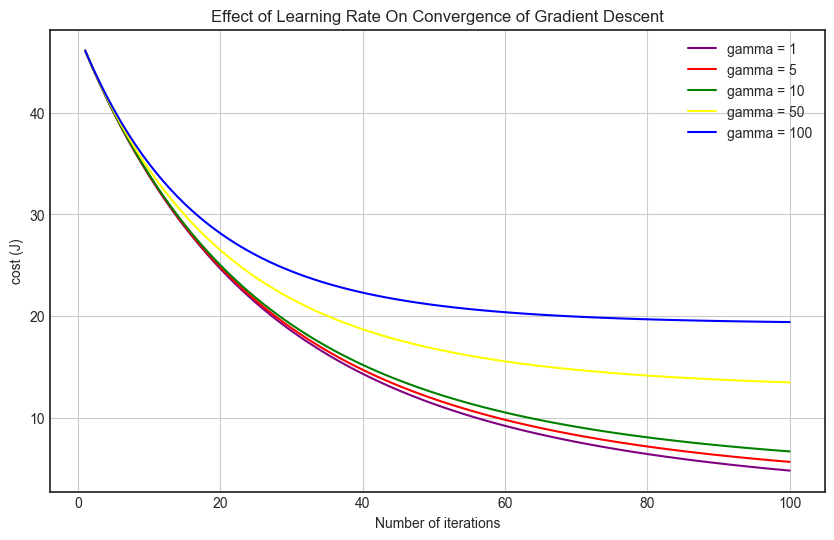

In [ ]:
iter = 100
theta = np.zeros(n)
lr=0.01
gamma = 1
theta_1, cost_history_1 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

gamma = 5
theta_2, cost_history_2 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

gamma = 10
theta_3, cost_history_3 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

gamma = 50
theta_4, cost_history_4 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

gamma = 100
theta_5, cost_history_5 = gradient_descent_reg(x, y, theta,lr, gamma, iter)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'gamma = 1')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'gamma = 5')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'gamma = 10')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'gamma = 50')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'gamma = 100')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

In [112]:
x,y = make_multi_sample(120,100)
m=x.shape[0]
n=x.shape[1]
print(m)
print(n)
theta = np.zeros(n)
iter = 100
gamma = 10

x=x.reshape(x.shape[0],x.shape[1])
X = np.hstack((np.ones((m,1)), x))
lr=0.01
gamma = 1
theta_1, cost_history_1 = gradient_descent_reg(x, y, theta,lr, gamma, iter)
print('Last 5 values from cost_history =', cost_history1[-5 :])


120
100
Last 5 values from cost_history = [0.56343699 0.55576273 0.54824778 0.54088715 0.53367607]


In [114]:
x,y = make_multi_sample(200,100)
m=x.shape[0]
n=x.shape[1]
print(m)
print(n)
theta = np.zeros(n)
iter = 100
gamma = 10

x=x.reshape(x.shape[0],x.shape[1])
X = np.hstack((np.ones((m,1)), x))
lr=0.01
gamma = 1
theta_2, cost_history_2 = gradient_descent_reg(x, y, theta,lr, gamma, iter)
print('Last 5 values from cost_history =', cost_history2[-5 :])


200
100
Last 5 values from cost_history = [3.86444815 3.86155393 3.85874804 3.85602716 3.85338813]


In [115]:
x,y = make_multi_sample(300,100)
m=x.shape[0]
n=x.shape[1]
print(m)
print(n)
theta = np.zeros(n)
iter = 100
gamma = 10

x=x.reshape(x.shape[0],x.shape[1])
X = np.hstack((np.ones((m,1)), x))
lr=0.01
gamma = 1
theta_3, cost_history_3 = gradient_descent_reg(x, y, theta,lr, gamma, iter)
print('Last 5 values from cost_history =', cost_history_3[-5 :])


300
100
Last 5 values from cost_history = [6.38192534 6.27551473 6.17147988 6.06975752 5.97028626]


In [ ]:
x,y = make_multi_sample(500,100)
m=x.shape[0]
n=x.shape[1]
print(m)
print(n)
theta = np.zeros(n)
iter = 100
gamma = 10

x=x.reshape(x.shape[0],x.shape[1])
X = np.hstack((np.ones((m,1)), x))
lr=0.01
gamma = 1
theta_1, cost_history_1 = gradient_descent_reg(x, y, theta,lr, gamma, iter)
print('Last 5 values from cost_history =', cost_history_4[-5 :])


500
100
Last 5 values from cost_history = [13.57723064 13.55086433 13.5253672  13.50070676 13.47685188]


We can checked that the loss function increased as the data set increased.